*This notebook can be found on* [github](https://github.com/bastikr/QuantumOptics.jl/blob/master/examples/two-qubit-entanglement.ipynb)

Entanglement of Two Qubits
=========================

Given a system of two qubits (two spin-1/2 particles) that are initially in a separable state (product state), it is necessary to apply a non-local operation in order to create entanglement between the qubits. We can do this by evolving the system with a non-local Hamiltonian, that will then periodically generate entanglement.

Consider two qubits initially in the state

$|\psi_0\rangle = |0\rangle \otimes |1\rangle = |\downarrow\rangle \otimes |\uparrow\rangle.$

If we compute the time evolution of this state with the Hamiltonian

$H = \Omega\left(\sigma^+\otimes \sigma^- + \sigma^-\otimes\sigma^+\right),$

we will see that entanglement is create periodically. The Von Neumann entropy of the reduced density matrix of one of the sub-systems will serve as the measure of the two-qubit entanglement. It is defined as

$S(\rho_\mathrm{red}) = -\mathrm{tr}\left(\rho_\mathrm{red}\log(\rho_\mathrm{red})\right) = -\sum_n\lambda_n\log(\lambda_n),$

where $\lambda_n$ is the $n$th eigenvalue of $\rho_\mathrm{red}$, $\log$ is the natural logarithm and we define $\log(0)\equiv 0$. In our case the reduced density matrix is

$\rho_\mathrm{red} = \mathrm{tr}_{1,2}(\rho),$

where $\rho$ is the density matrix of the entire system and $\mathrm{tr}_{1,2}$ is the partial trace over the first or second qubit.

As always, we start by importing the required libraries and define the necessary paramters.

In [1]:
using QuantumOptics
using PyPlot

# Parameters
Ω = 0.5
t = [0:0.1:10;];

Then we proceed to define the Qubit basis as spin-1/2 basis and write our Hamiltonian accordingly.

In [3]:
# Hamiltonian
b = SpinBasis(1//2)
H = Ω*(sigmap(b) ⊗ sigmam(b) + sigmam(b) ⊗ sigmap(b));

Defining the initial state, we can evolve using a Schrödinger equation since there is no incoherent process present.

In [4]:
ψ₀ = spindown(b) ⊗ spinup(b)
tout, ψₜ = timeevolution.schroedinger(t, ψ₀, H);

As explained above, we need the reduced density matrix of one of the Qubits. We therefore take the partial trace and compute the Von Neumann entropy using the implemented function `entropy_vn`. Note, that the maximal VN entropy is $\log(2)$. Here, we rescale it by this factor, such that $0\leq S \leq 1$.

In [5]:
# Reduced density matrix
ρ_red = [ptrace(ψ ⊗ dagger(ψ), 1) for ψ=ψₜ]
S = [entropy_vn(ρ)/log(2) for ρ=ρ_red];

Finally, we plot the result.

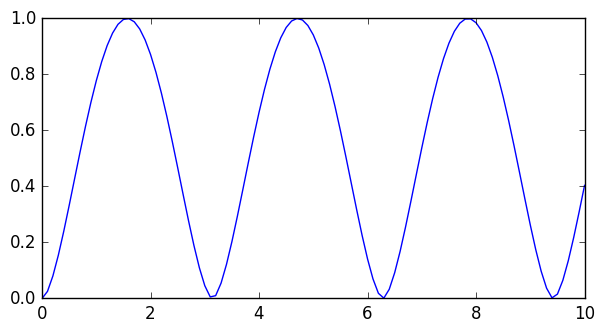

In [6]:
figure(figsize=(7, 3.5))
plot(tout, S)
show()